# Milestone 1: Exploratory Data Analysis

**Authors**: __Khizer Zakir & Rodrigo Brust Santos__

__October 2023__

# Table of Contents <a name="home"></a>

[1. Data Description]()

[1.1 Data Collection](#data-collection)

[1.2 Meaning of the Dataset]()

[1.3 Explanatory Variables](#1.3)

[1.4 Reponsible Variable](1.4)

[2. Data Preparation](#2)

[2.1 Cleaning Tidy Data](#2.1)

[2.2 Data Splitting](#2.2)

[2.3 Data Normalization](#2.3)

[3. Visual Exploration](#3)

[3.1 Visualizing the Dataset](#3.1) 

[4. Statistical Exploration](#4)

[4.1 Descriptive Statistics](#4.1)

[4.2 Correlation Analysis](#4.2)

[4.3 Spatial Analysis](#4.3)

[5. Evaluation Protocol](#5)

[6. References](#6-references)


<a name="dataset-description"></a>
## 1. Dataset Description 

**Objective**: Prediction/Interpolation of elemental concentrations

### 1.1 Data Collection <a name="data-collection"></a>

The data was collected from the Brazilian Geological Survey (CPRM) in the folder of the [Destrito Zincífero de Vazante, Minas Gerais (MG), Brasil](https://rigeo.cprm.gov.br/handle/doc/19397) (_Zinc-enriched District of Vazante, Minas Gerais State, Brazil_), acronym `DZV`. The stream sediments dataset was requested by e-mail to CPRM and promptly made available.

The dataset that will be explored is the Stream Sediments Geochemical Samples from DZV, which is a program that has been conducted in the northwest region of Minas Gerais State, Brazil, published in 2017 to aid exploration and development of mineral industry focused on **Zinc ore**. 

`Stream sediments` are sediment samples collected from a stream, river or water body. It consists in the product of physical and chemical weathering over rocks, that end up in the dreinage channel caried by surface runoff (Rose et al, 1979). Such material is fundamental for the targeting of mineral ore body, and it has been used for thousand years by humankind (Ottesen and Theobald, 1994, Doherty et al, 2023).


### 1.2 Meaning of the Dataset <a name="meaning-dataset"></a>

#### Context

The `DZV` lies within the Brasília Belt, more specifically in the center-south part (Almeida, 1967 & 1968).  This geological terrain was formed in the Brasiliano Cycle, during the Neoproterozoic period (1Ga to 500Ma), when the cratons of São Francisco, Amazonas, and Paranapanema collided. This collision was one of many that created the big southern paleocontinent Gondwana. (Valeriano et al., 2004; Pimentel et al., 2011).

The shock of three cratons led to the Brasilia Belt (Figure 2). This collision generated 3 geological compartments of the folding belt: the Inner Zone, the External Zone, and the Cratonic Domain. Since the area of interest (AOI) is located in the External Zone, that is where we are focusing - highlighted by the purple box in Figure 2. 

|![brasilia-belt.png](./images/brasilia_belt_draw.png)|
| :--: |
|*Figure 2: Brasília Belt geological setting and position. It is a strip that connects both São Francisco Craton and Paranapanema Craton, that nowadays is under the Paraná Basin. The stream sediments are located in the region of the purple draw square, in the cities of Paracatu, Vazante, and Coromandel. Source: Valeriano, 2016.*|

The `DZV` is located in the External Zone of Brasília Belt. The main mineralizations of Zn are within the Vazante Group (Dias et al., 2015). In Geology, a group is a grouping of geologic formations. Each formation is characterized by a couple of lithologies. Within Vazante Group, there are in total 3 Formations: Lapa Fm, Serra do Poço, and Morro do Calcário Fm, Serra do Garrote Fm. They are always displayed from the youngest to the oldest, as shown in Figure 3. Groups and formations are classified according to the similarities between the lithologies, being different from rock bodies in the surroundings, and that also occupies a particular position in the layers of rock exposed in a geographical region (Boggs, 1987).

| ![vazante_group.png](./images/vazante_group_modified.png) |
|:--:|
|_Figure 3: Vazante Group stratigraphic column. Modified from [Aldi et al. (2022)](https://www.researchgate.net/publication/362722519_LA-ICP-MS_Trace_Element_Composition_of_Sphalerite_and_Galena_of_the_Proterozoic_Carbonate-Hosted_Morro_Agudo_Zn-Pb_Sulfide_District_Brazil_Insights_into_Ore_Genesis)_|


In total, in the `DZV`, there are 6 mines extracting Zn-ore, mainly by the mineral willemite (Zn2SiO4 - Zinc Silicate). In some areas, the concentration of Zn can reach 8000 ppm (Dias et al., 2015).  

#### Objectives

Having this background in mind, the main objective of this project is to estimate zinc concentration with the aid of Machine Learning Regresssion algorithms, based on the stream sediment samples collected in the `DZV`. 

Due to the 1st law of Geography, where "everything is related to everything, but near things are more related than distant things"; and due to the geological setting of the region, it is expected that the areas with the highest concentration of `Zn(ppm)` are located in the eastern part of the grid of stream sediment samples, where several operational mining sites already exist.

___



### 1.3 Explanatory Variables <a name="explanatory-variables"></a>
List and describe the types and numbers of explanatory variables.


In [1]:
# Import necessary libraries
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import geopandas as gpd
import folium

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import re
import time 
from tabulate import tabulate
import warnings

from milestone_functions import ldl, udl, plot_correlation_heatmap, plot_numeric_feature_histograms, plot_scatterplots

warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = '../dataset/stream_samples_original.csv'
df = pd.read_csv(file_path, sep = ';')

#-- renaming columns

df = df.rename(columns={'Estação':'station',
                        'N__Lab_':'lab',
                        'Long__X_':'x',
                        'Lat__Y_': 'y',
                        'Folha':'map_idx'})


# Display the first few rows of the dataset
df.head()


,station,lab,x,y,map_idx,Ag (ppm),Al (%),As (ppm),Au (ppm),B (ppm),...,Ta (ppm),Te (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0002,CDE225,248757,7972050,Coromandel,0.03,2.63,4,<0.1,<10,...,<0.05,0.06,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,AC-0003,CDE226,244460,7973135,Coromandel,0.02,1.93,2,<0.1,<10,...,<0.05,0.14,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,AC-0004,CDE227,244044,7970217,Coromandel,0.04,1.47,3,<0.1,<10,...,<0.05,0.08,5.4,0.04,0.65,55,0.2,10.40,34,1.8
3,AC-0005,CDE228,242895,7970593,Coromandel,0.05,1.72,23,<0.1,<10,...,<0.05,<0.05,6.9,0.04,1.01,66,0.7,9.34,27,4.1
4,AC-0006,CDE229,242999,7971416,Coromandel,0.04,0.97,7,<0.1,<10,...,<0.05,<0.05,5.7,0.05,0.82,41,0.4,7.45,28,1.5


In [3]:
#separating the Zn into an array
Y = df.iloc[:, -2].to_numpy()

#separating all  explanatory variables into X

idx_to_remove = [0,1,4,-2] #we won't use these variables

X = df.drop(df.columns[idx_to_remove], axis=1).to_numpy()

In [4]:
#Explanatory Variables

print("\n Type of X Values:")
print(type(X))
print("\nshape of X:")
print(X.shape)


 Type of X Values:
<class 'numpy.ndarray'>

shape of X:
(709, 52)


**Not used variables**

These variables are going to be removed because they don't play any important role in the data. These are variables that helps to identify where the samples were analyzed, the number of the collection point and also in which map scale it is located at.

- `station` (_object_): means Station. It is the ID of the collecting point.

- `lab` (_object_): identification of the lab that performed the stream sediment analysis.

- `map_idx` (_object_): mapping site

**Location Variables**

- `x` (_int64_): coordinates in the X axis.

- `y` (_int64_): coordinates in the Y axis.



**Explanatory Variables**

- `element (ppm)` (_float64_): element measured in parts per million

- `element (%)`(_float64_): element measured in percentage

| Chemical Element | Element Name |
|------------------|--------------|
| Ag (ppm)         | Silver       |
| Al (%)           | Aluminum     |
| As (ppm)         | Arsenic      |
| Au (ppm)         | Gold         |
| B (ppm)          | Boron        |
| Ba (ppm)         | Barium       |
| Be (ppm)         | Beryllium    |
| Bi (ppm)         | Bismuth      |
| Ca (%)           | Calcium      |
| Cd (ppm)         | Cadmium      |
| Ce (ppm)         | Cerium       |
| Co (ppm)         | Cobalt       |
| Cr (ppm)         | Chromium     |
| Cs (ppm)         | Cesium       |
| Cu (ppm)         | Copper       |
| Fe (%)           | Iron         |
| Ga (ppm)         | Gallium      |
| Ge (ppm)         | Germanium    |
| Hf (ppm)         | Hafnium      |
| Hg (ppm)         | Mercury      |
| In (ppm)         | Indium       |
| K (%)            | Potassium    |
| La (ppm)         | Lanthanum    |
| Li (ppm)         | Lithium      |
| LREE (ppm)       | Light Rare Earth Elements |
| Mg (%)           | Magnesium    |
| Mn (ppm)         | Manganese    |
| Mo (ppm)         | Molybdenum   |
| Na (%)           | Sodium       |
| Nb (ppm)         | Niobium      |
| Ni (ppm)         | Nickel       |
| P (ppm)          | Phosphorus   |
| Pb (ppm)         | Lead         |
| Rb (ppm)         | Rubidium     |
| Re (ppm)         | Rhenium      |
| S (%)            | Sulfur       |
| Sb (ppm)         | Antimony     |
| Sc (ppm)         | Scandium     |
| Se (ppm)         | Selenium     |
| Sn (ppm)         | Tin          |
| Sr (ppm)         | Strontium    |
| Ta (ppm)         | Tantalum     |
| Te (ppm)         | Tellurium    |
| Th (ppm)         | Thorium      |
| Ti (%)           | Titanium     |
| U (ppm)          | Uranium      |
| V (ppm)          | Vanadium     |
| W (ppm)          | Tungsten     |
| Y (ppm)          | Yttrium      |
| Zr (ppm)         | Zirconium    |


*_Disclamer_*: in geology, the chemical elements are separated in two types of elements: `Major` and `Trace`. 

All `Major elements`, such as Al, K, and Fe, for example, are measured in percentage (%). These elements typically constitute a significant portion of the sediment's composition, so their concentrations are conveniently expressed as percentages. 

Meanwhile all `Trace elements` are measured in ppm.  These elements, presented in much lower concentrations, include valuable minerals, heavy metals, and other trace elements like gold (Au), silver (Ag), copper (Cu), and various rare earth elements. Even in trace amounts, these elements can be essential indicators for mineral deposits or provide valuable information about the geological environment.



### 1.4 Response Variable <a name="1.4"></a>
Describe the response variable and its type.

**Response Variable**

- `Zn (ppm)` (_float64_): concentration of Zinc in ppm.

| Chemical Element | Element Name |
|------------------|--------------|
| Zn (ppm)| Zinc | 


In [5]:
res_variables = df.iloc[:, -2]

print("Feature Name:", res_variables.name)

print("\nType of Y Values:")
print(type(Y))

print("\nshape of Y:")
print(Y.shape)

Feature Name: Zn (ppm)

Type of Y Values:
<class 'numpy.ndarray'>

shape of Y:
(709,)


___

## 2 Data Preparation <a name="2"></a>

### 2.1 Cleaning tidy data <a name="2.1"></a>

[Table of Contents](#home)

In [6]:
df.head(2)

,station,lab,x,y,map_idx,Ag (ppm),Al (%),As (ppm),Au (ppm),B (ppm),...,Ta (ppm),Te (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0002,CDE225,248757,7972050,Coromandel,0.03,2.63,4,<0.1,<10,...,<0.05,0.06,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,AC-0003,CDE226,244460,7973135,Coromandel,0.02,1.93,2,<0.1,<10,...,<0.05,0.14,8.2,0.06,0.94,58,0.3,23.90,58,6.9


In [7]:
idx_to_remove = [0,1,4]

df = df.drop(df.columns[idx_to_remove], axis=1)

print('Shape of the dataframe with all elements:', df.shape)


Shape of the dataframe with all elements: (709, 53)


In [8]:
df.columns

Index(['x', 'y', 'Ag (ppm)', 'Al (%)', 'As (ppm)', 'Au (ppm)', 'B (ppm)',
       'Ba (ppm)', 'Be (ppm)', 'Bi (ppm)', 'Ca (%)', 'Cd (ppm)', 'Ce (ppm)',
       'Co (ppm)', 'Cr (ppm)', 'Cs (ppm)', 'Cu (ppm)', 'Fe (%)', 'Ga (ppm)',
       'Ge (ppm)', 'Hf (ppm)', 'Hg (ppm)', 'In (ppm)', 'K (%)', 'La (ppm)',
       'Li (ppm)', 'LREE (ppm)', 'Mg (%)', 'Mn (ppm)', 'Mo (ppm)', 'Na (%)',
       'Nb (ppm)', 'Ni (ppm)', 'P (ppm)', 'Pb (ppm)', 'Rb (ppm)', 'Re (ppm)',
       'S (%)', 'Sb (ppm)', 'Sc (ppm)', 'Se (ppm)', 'Sn (ppm)', 'Sr (ppm)',
       'Ta (ppm)', 'Te (ppm)', 'Th (ppm)', 'Ti (%)', 'U (ppm)', 'V (ppm)',
       'W (ppm)', 'Y (ppm)', 'Zn (ppm)', 'Zr (ppm)'],
      dtype='object')

______
Before explaining the variables, it is necessary to remove the elements that do not have sufficient records. Arbitrarily, a limit of 50% was chosen. 
For example: in the space of 709 samples, gold in parts per million (Au (ppm)) is recorded below the detection limit (LDL) in 699 samples, i.e. 98.5% of the samples. As the vast majority of samples could not be detected, the Au element was discarded.
This is necessary because it is impractical to look for anomaly patterns in missing or undetected data.

In [9]:
#value counts of Au (ppm). We can see that the majority of the samples were below the low detection limit (LDL)
df['Au (ppm)'].value_counts()

Au (ppm)
<0.1    699
0.1       4
26.9      1
0.6       1
0.2       1
3.1       1
1.6       1
0.4       1
Name: count, dtype: int64

In [10]:
#-- Remove elements with less than 50% of register 

#-- getting all the column names
string_elements_name = df.select_dtypes(include=['object'])

# Creating an empty list for elements to remove
remove = []

# Iterate through all elements
for e in string_elements_name.columns:
    try:
        # Count the number of occurrences of '<' and '>'
        minus = df[e].str.count('<').sum()
        plus = df[e].str.count('>').sum()
        # Calculate validity percentage
        validity = 1 - ((minus + plus) / df.shape[0])
        
        # Check if the validity is less than 0.5, mark for removal
        if validity < 0.5:
            print(f'{e} was removed. Expected at least 50%, but got {100*validity:.2f}%.')
            remove.append(e)
    except KeyError:
        pass

# Filter the dataframe by dropping specified columns
df = df.drop(columns=remove)

display(df.head())

df.shape

Au (ppm) was removed. Expected at least 50%, but got 1.41%.
B (ppm) was removed. Expected at least 50%, but got 1.69%.
Ge (ppm) was removed. Expected at least 50%, but got 30.61%.
Na (%) was removed. Expected at least 50%, but got 6.21%.
Re (ppm) was removed. Expected at least 50%, but got 0.00%.
S (%) was removed. Expected at least 50%, but got 30.18%.
Se (ppm) was removed. Expected at least 50%, but got 8.32%.
Ta (ppm) was removed. Expected at least 50%, but got 9.73%.
Te (ppm) was removed. Expected at least 50%, but got 38.79%.


,x,y,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,248757,7972050,0.03,2.63,4,76,1,0.31,0.05,0.03,...,1.5,3.3,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,244460,7973135,0.02,1.93,2,84,1.7,0.29,0.04,0.01,...,1.6,3.1,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,244044,7970217,0.04,1.47,3,70,0.7,0.19,0.11,0.06,...,0.9,3.9,5.4,0.04,0.65,55,0.2,10.40,34,1.8
3,242895,7970593,0.05,1.72,23,80,1.1,0.32,0.04,0.08,...,1.1,3.1,6.9,0.04,1.01,66,0.7,9.34,27,4.1
4,242999,7971416,0.04,0.97,7,56,0.5,0.22,0.03,0.05,...,0.7,2.5,5.7,0.05,0.82,41,0.4,7.45,28,1.5


(709, 44)

In [11]:
df.dtypes

x               int64
y               int64
Ag (ppm)       object
Al (%)        float64
As (ppm)       object
Ba (ppm)       object
Be (ppm)       object
Bi (ppm)      float64
Ca (%)         object
Cd (ppm)       object
Ce (ppm)      float64
Co (ppm)      float64
Cr (ppm)        int64
Cs (ppm)      float64
Cu (ppm)      float64
Fe (%)         object
Ga (ppm)      float64
Hf (ppm)       object
Hg (ppm)       object
In (ppm)       object
K (%)          object
La (ppm)      float64
Li (ppm)       object
LREE (ppm)    float64
Mg (%)         object
Mn (ppm)        int64
Mo (ppm)      float64
Nb (ppm)      float64
Ni (ppm)      float64
P (ppm)        object
Pb (ppm)      float64
Rb (ppm)      float64
Sb (ppm)      float64
Sc (ppm)      float64
Sn (ppm)       object
Sr (ppm)       object
Th (ppm)      float64
Ti (%)         object
U (ppm)       float64
V (ppm)         int64
W (ppm)        object
Y (ppm)       float64
Zn (ppm)        int64
Zr (ppm)       object
dtype: object

_____

For the other elements that have a number of records above 50%, we need to deal with some samples that have values below (LDL) or above (UDL). To do this, we will use a widespread solution (Reimann et al., 2008), which is


if $ \varepsilon $ < $LDL$, then $\frac{LDL}{2}$ 

if $ \varepsilon $ > $UDL$, then $\frac{3*UDL}{2}$  

where $ \varepsilon $ = Element



In [12]:
#taking out all < or > symbols, and convert all columns to float.

for col in df:
    #if the column is numeric type, it'll pass
    if (is_numeric_dtype(df[col])):
        pass
    #if the column is string type, it'll remove symbols and the convert to float
    elif (is_string_dtype(df[col])):
        try:
            df[col] = df[col].apply(lambda x: ldl(x))
        except:
            df[col] = df[col].apply(lambda x: udl(x))

In [13]:
#checking if all columns are transformed to numeric
df.dtypes.value_counts()

float64    38
int64       6
Name: count, dtype: int64

In [14]:
df.isna().sum() #checking for NaN values in the dataset

x             0
y             0
Ag (ppm)      0
Al (%)        0
As (ppm)      0
Ba (ppm)      0
Be (ppm)      0
Bi (ppm)      0
Ca (%)        0
Cd (ppm)      0
Ce (ppm)      0
Co (ppm)      0
Cr (ppm)      0
Cs (ppm)      0
Cu (ppm)      0
Fe (%)        0
Ga (ppm)      0
Hf (ppm)      0
Hg (ppm)      0
In (ppm)      0
K (%)         0
La (ppm)      0
Li (ppm)      0
LREE (ppm)    0
Mg (%)        0
Mn (ppm)      0
Mo (ppm)      0
Nb (ppm)      0
Ni (ppm)      0
P (ppm)       0
Pb (ppm)      0
Rb (ppm)      0
Sb (ppm)      0
Sc (ppm)      0
Sn (ppm)      0
Sr (ppm)      0
Th (ppm)      0
Ti (%)        0
U (ppm)       0
V (ppm)       0
W (ppm)       0
Y (ppm)       0
Zn (ppm)      0
Zr (ppm)      0
dtype: int64

In [15]:
#-- export cleaned data

df.to_csv('../dataset/stream_samples_cleaned.csv', index = False)

_____

### 2.2 Splitting Data <a name="2.2"></a>


Explain how you will split the dataset into training and testing data to avoid data leakage.

- Now that our dataset is cleaned, it is possible to separate in test, train and validation datasets.

- We are using the proportion 80/20 for training and testing. 

- The dataset was split into training and testing before any normalization was performed. It is important to note that, despite the separation, the variable we want to predict, the Zinc element, is still present in both tables (training and testing), and will be properly processed. It is fully known that, if not properly processed, it will result in data leakage.

- Furthermore, in order to improve the training part of the algorithm, cross-validation with k=5 will be used.



In [16]:
# set aside 20% of train and test data for evaluation
train, test = train_test_split(df,test_size=0.2, shuffle=True, random_state=42)

print("train shape: {}".format(train.shape))
print("test shape: {}".format(test.shape))

train shape: (567, 44)
test shape: (142, 44)


### 2.3 Dataset normalization <a name="2.3"></a>


In order to normalize the dataset, log normalization will be used.

- The logarithmic normalization is widely used in stream samples research, such as Marques et al. (2023). Such transformations are responsible for reducing [Spurious correlations](https://en.wikipedia.org/wiki/Spurious_relationship), facilitating the interpretation; and for reducing the closure effect on data (Pawlowsky-Glahn and Olea, 2004; Pawlowsky-Glahn and Egozcue, 2016).

In [17]:
train.head(2)

,x,y,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
310,269916,7935396,0.005,1.32,4.0,76.0,0.90,0.14,0.040,0.070,...,1.0,5.6,5.0,0.020,0.75,56,0.05,5.49,22,9.7
523,305017,7948833,0.040,0.77,2.0,18.0,0.05,0.06,0.005,0.005,...,0.9,1.3,3.5,0.005,0.40,23,0.30,1.51,4,2.8


In [18]:
train.columns[2:]

Index(['Ag (ppm)', 'Al (%)', 'As (ppm)', 'Ba (ppm)', 'Be (ppm)', 'Bi (ppm)',
       'Ca (%)', 'Cd (ppm)', 'Ce (ppm)', 'Co (ppm)', 'Cr (ppm)', 'Cs (ppm)',
       'Cu (ppm)', 'Fe (%)', 'Ga (ppm)', 'Hf (ppm)', 'Hg (ppm)', 'In (ppm)',
       'K (%)', 'La (ppm)', 'Li (ppm)', 'LREE (ppm)', 'Mg (%)', 'Mn (ppm)',
       'Mo (ppm)', 'Nb (ppm)', 'Ni (ppm)', 'P (ppm)', 'Pb (ppm)', 'Rb (ppm)',
       'Sb (ppm)', 'Sc (ppm)', 'Sn (ppm)', 'Sr (ppm)', 'Th (ppm)', 'Ti (%)',
       'U (ppm)', 'V (ppm)', 'W (ppm)', 'Y (ppm)', 'Zn (ppm)', 'Zr (ppm)'],
      dtype='object')

In [23]:
tmp_train = train.copy()
tmp_test = test.copy()


for i in tmp_train.columns[2:]:
    tmp_train[i] = np.absolute(np.log10(tmp_train[i]))
    
print('--- Train dataframe normalized ---')

for i in tmp_test.columns[2:]:
    tmp_test[i] = np.absolute(np.log10(tmp_test[i]))
    
print('--- Test dataframe normalized ---')



--- Train dataframe normalized ---
--- Test dataframe normalized ---


In [27]:
#-- converting everything back to dataframes

pd.DataFrame(tmp_train,
                        columns= df.columns
                        ).to_csv(
                            '../dataset/train_test/training.csv',
                             index = False
                        )

pd.DataFrame(tmp_test,
                       columns = df.columns
                       ).to_csv(
                           '../dataset/train_test/testing.csv', 
                           index = False
                       )


## 3. Visual Exploration <a name="3"></a>

[Table of Contents](#home)

**Description**

This section focuses on the visualization of our dataset. Visualization is a strong tool to understand your data. The main objective is to gain a comprehensive understanding of the **relationships** and **distributions** within the explanatory variables. This visual representation can also help us detect some outliers in our dataset. 

We will plot histograms, scatterplots, correlation matrices, and plot the geographic map of the data points. Historgrams will explain the distribution of all the explanatory variables to ensure if a normalization is necessary or not. The scatterplots will help understand the data pattern and their relationship with the target variable; strong/weak and/or positive/negative. In addition, the correlation matrices will provide precise information **(strength of the relationship)** within all the explanatory variables and with the target variable as well.


In [ ]:
#!pip install tabulate

In [28]:
# original dataset to see the distribution of the data 

file_path = '../dataset/stream_samples_cleaned.csv'
df = pd.read_csv(file_path)
df.head()


,x,y,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),Bi (ppm),Ca (%),Cd (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,248757,7972050,0.03,2.63,4.0,76.0,1.0,0.31,0.05,0.03,...,1.5,3.3,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,244460,7973135,0.02,1.93,2.0,84.0,1.7,0.29,0.04,0.01,...,1.6,3.1,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,244044,7970217,0.04,1.47,3.0,70.0,0.7,0.19,0.11,0.06,...,0.9,3.9,5.4,0.04,0.65,55,0.2,10.40,34,1.8
3,242895,7970593,0.05,1.72,23.0,80.0,1.1,0.32,0.04,0.08,...,1.1,3.1,6.9,0.04,1.01,66,0.7,9.34,27,4.1
4,242999,7971416,0.04,0.97,7.0,56.0,0.5,0.22,0.03,0.05,...,0.7,2.5,5.7,0.05,0.82,41,0.4,7.45,28,1.5



### 3.1 Visualizing the Dataset <a name="3.1"></a>

Provide a few figures to help understand the dataset.


#### Figure 1: Scatterplot on the main data

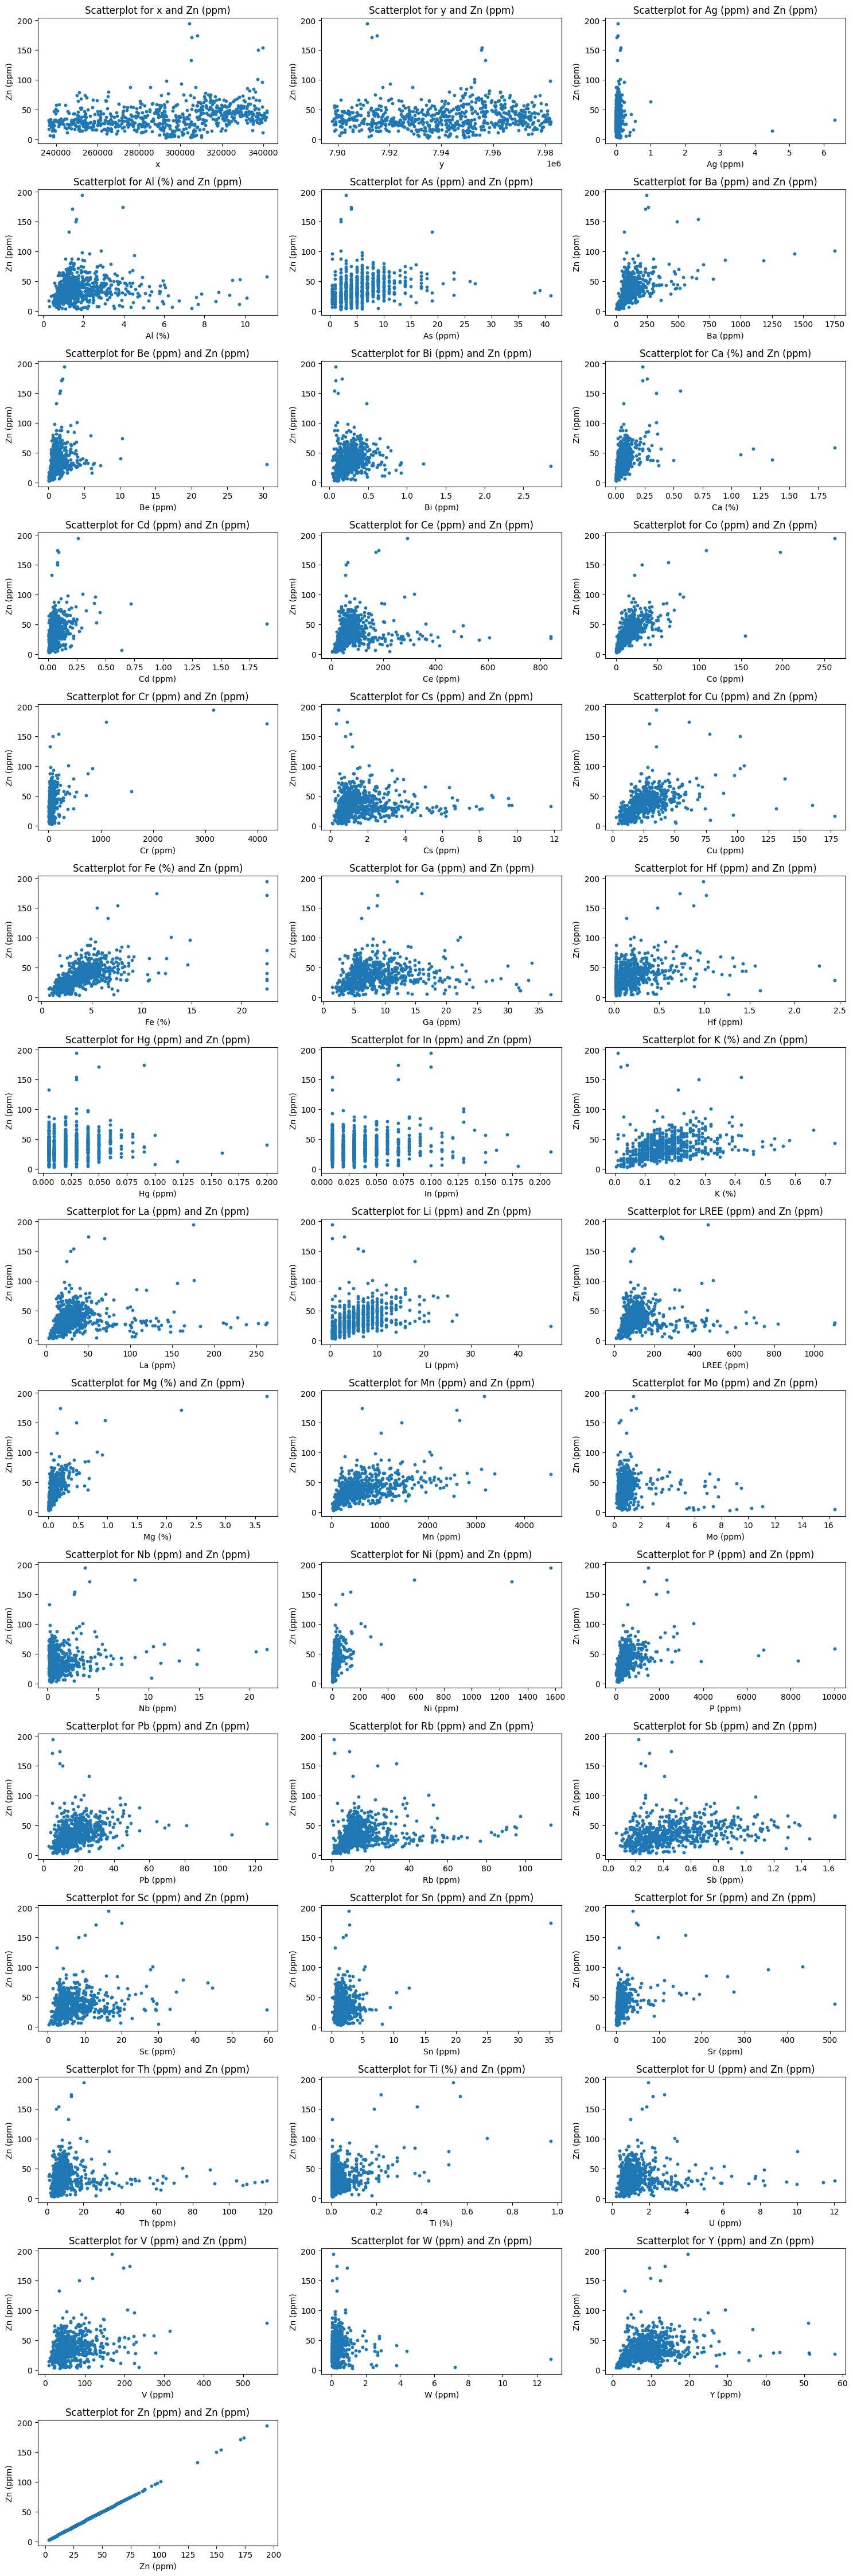

In [29]:
plot_scatterplots(df)

**Interpretation**

This is the first and the most important thing/plot to look for when analyzing data of any kind. Especially when you are trying to understand the relationship of large number of explanatory variables against a target variable. This already sets you up to anticipate the following steps. 

Overall, we can see that the majority of the relationships between Zn and other variables are always positive, being stronger or not. For elements like Cobalt and Copper, visually, there is a high slope relationship to Zinc, meanwhile Mercury (Hg) and Lanthanide (Ln) aren't well definied.
_____

#### Figure 2: Histogram for the main data

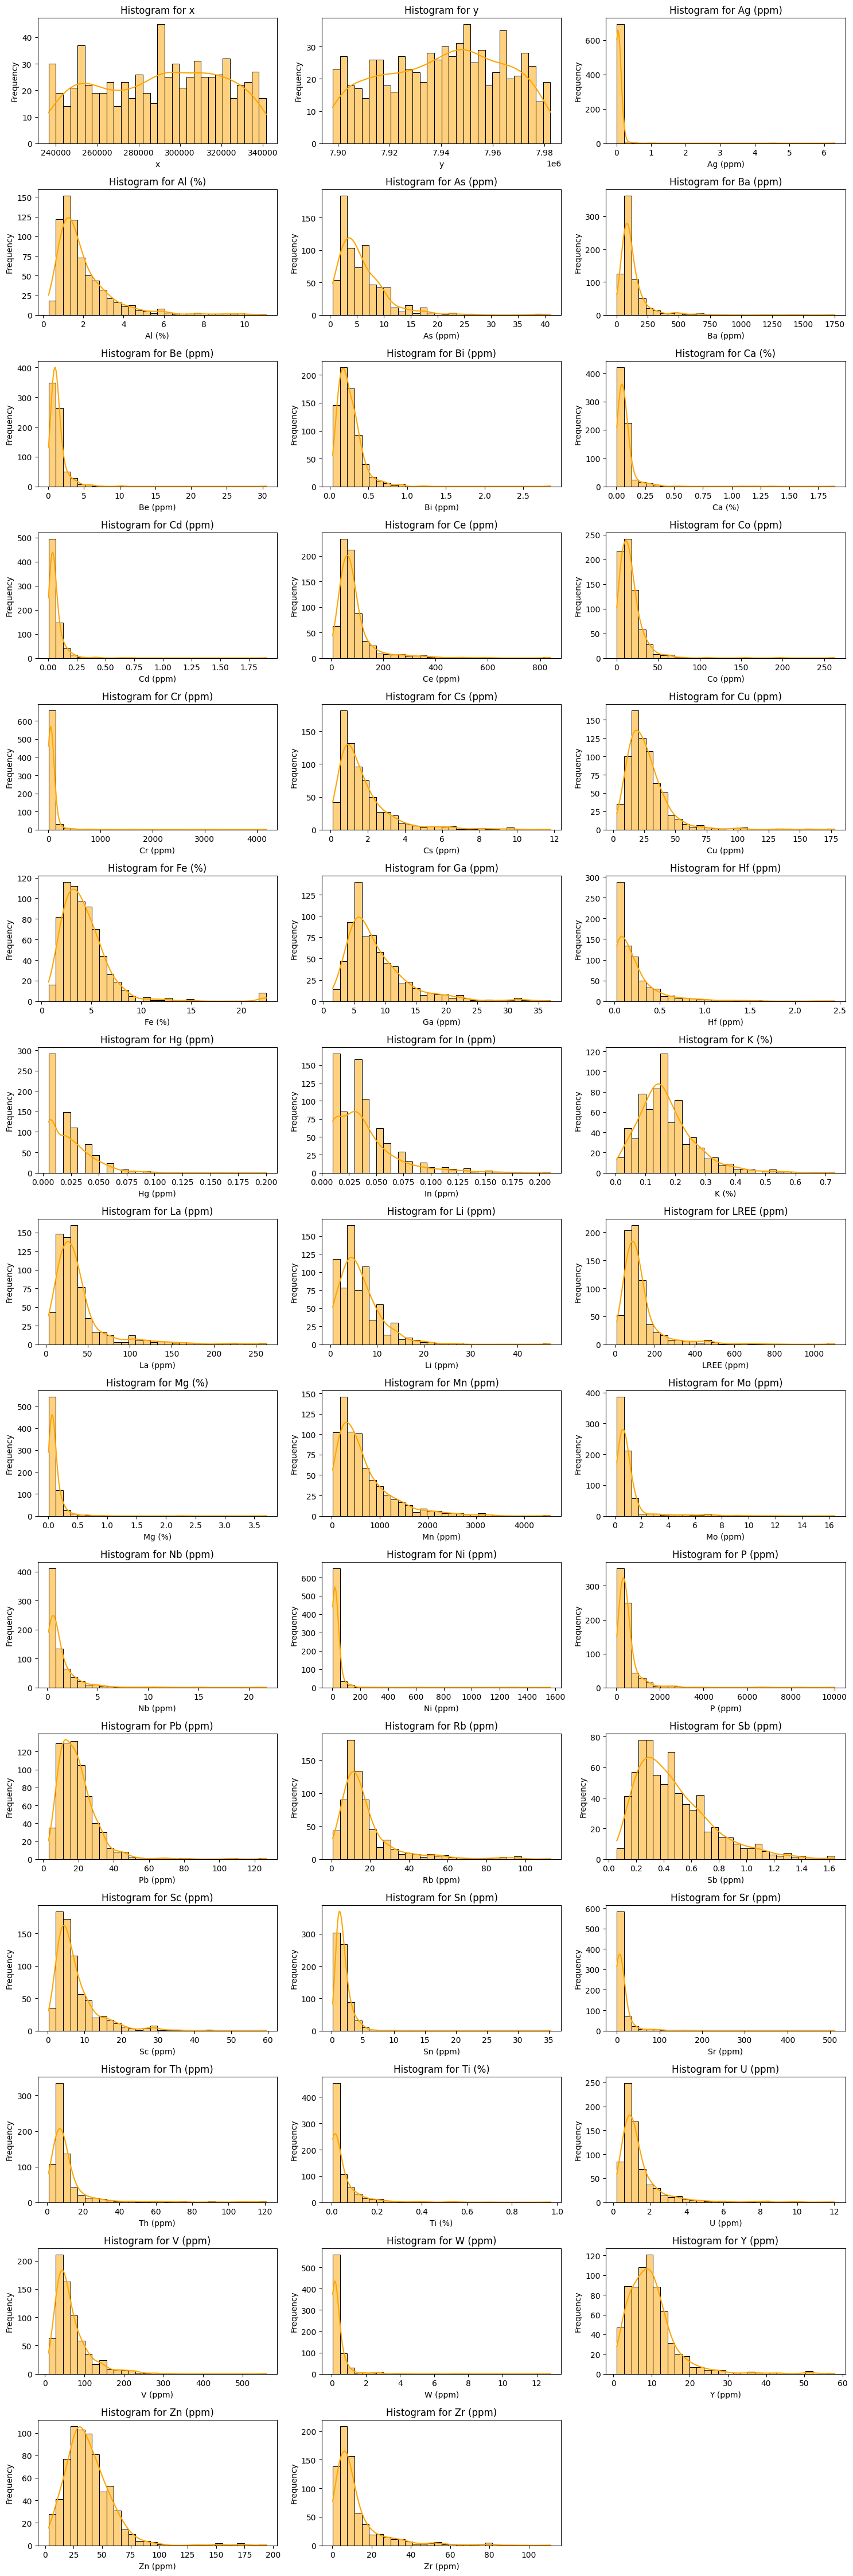

In [30]:
plot_numeric_feature_histograms(df)

#### 3.1.1 Visualize Normalized Train and Test

In [31]:
#importing normalized train and test data 
training = pd.read_csv('../dataset/train_test/training.csv')
testing = pd.read_csv('../dataset/train_test/testing.csv')


### Figure 4: Log-transformed Training Data Histograms

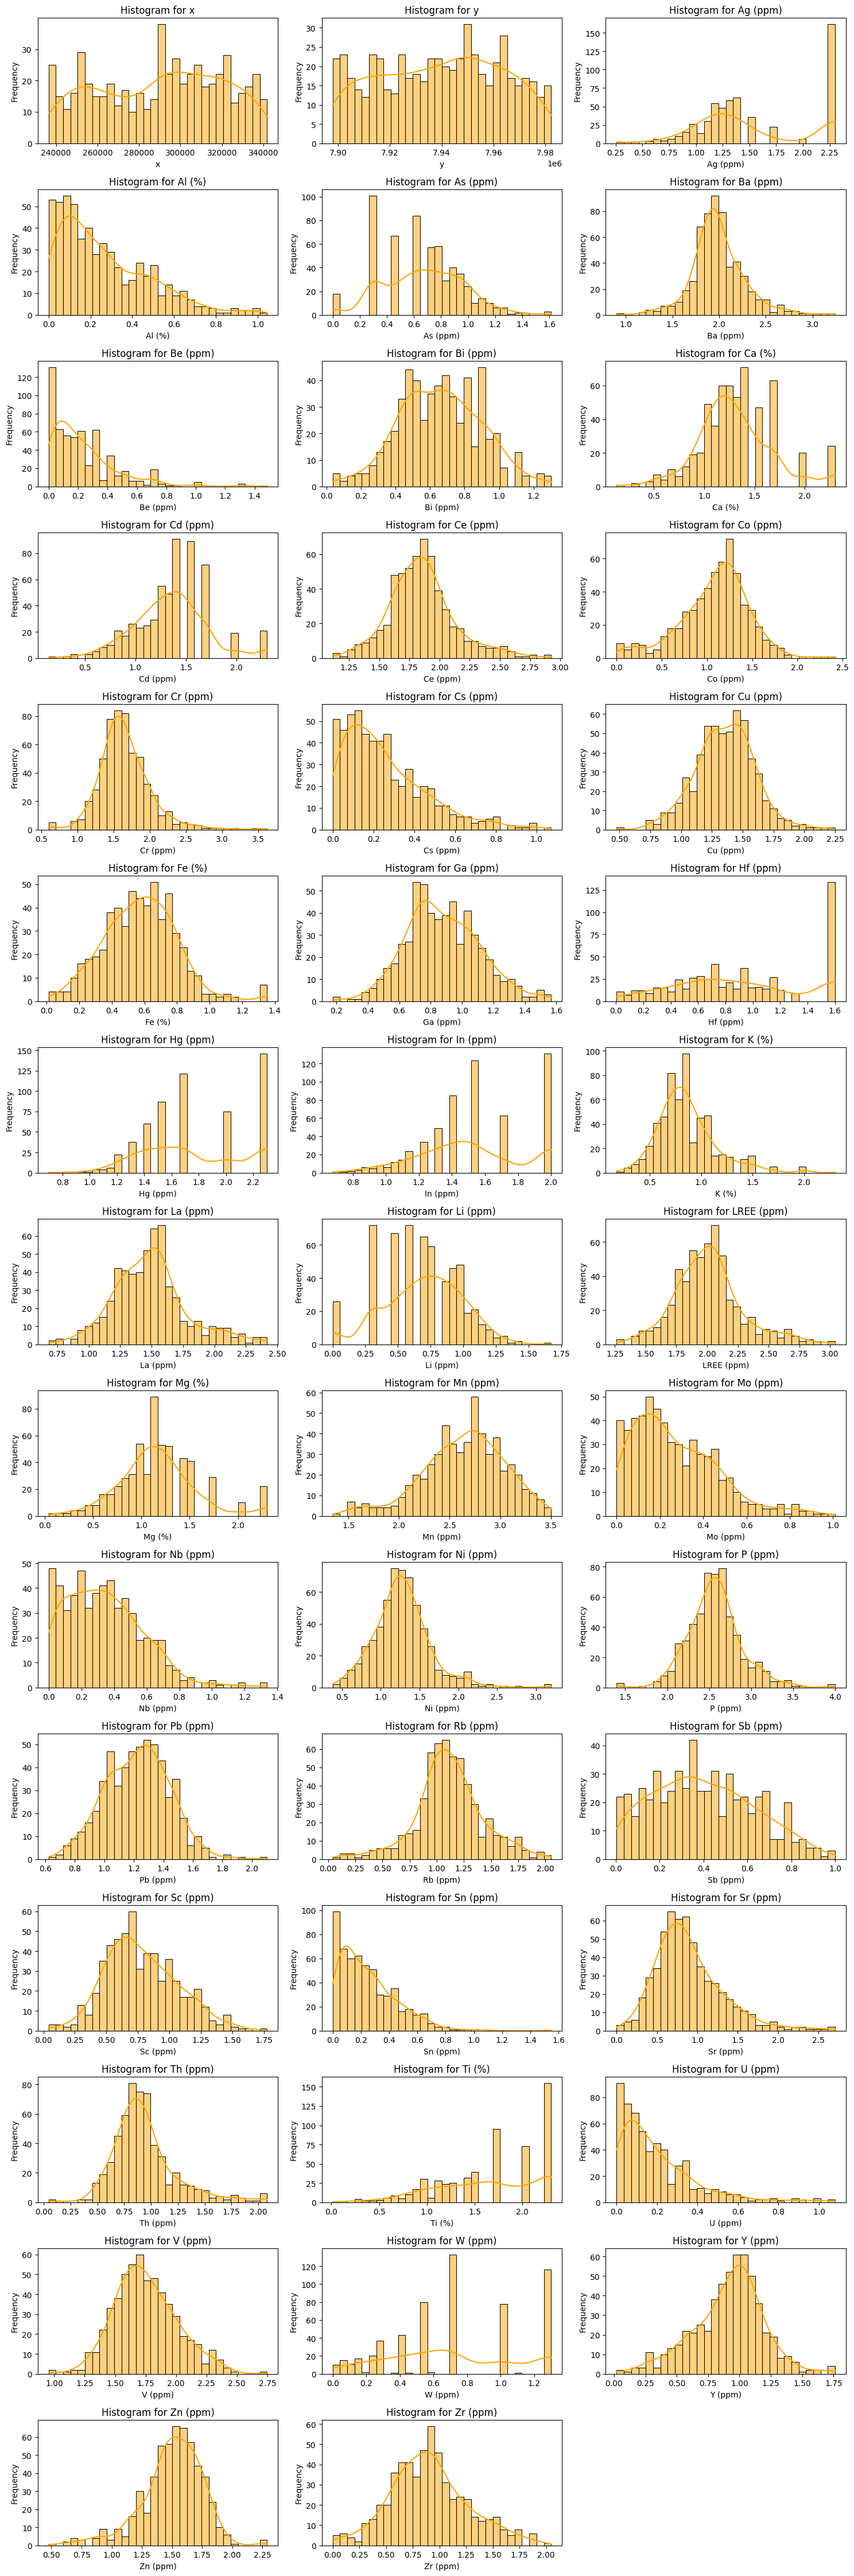

In [32]:
plot_numeric_feature_histograms(training)

**Interpretation**

The log transformed plots demonstrate a bigger amount of normal distribution, which was expected. This plot really helps to understand the distribution of the data values and handle the effect of outliers, high variance and the skewness of the data. This transformation is crucial as it aids the selection of important variables for the later stages.

___

#### Figure 5: Scatterplot for the log-normalized training data

In [33]:
#plot_scatterplots(training)


**Interpretation**

This code has not been run intentionally to avoid a lengthy notebook; However, the relationship between each individual explanatory variable with the target variable has not changed significantly. 

___

#### Figure 6: Correlation plot for the log-normalized training data

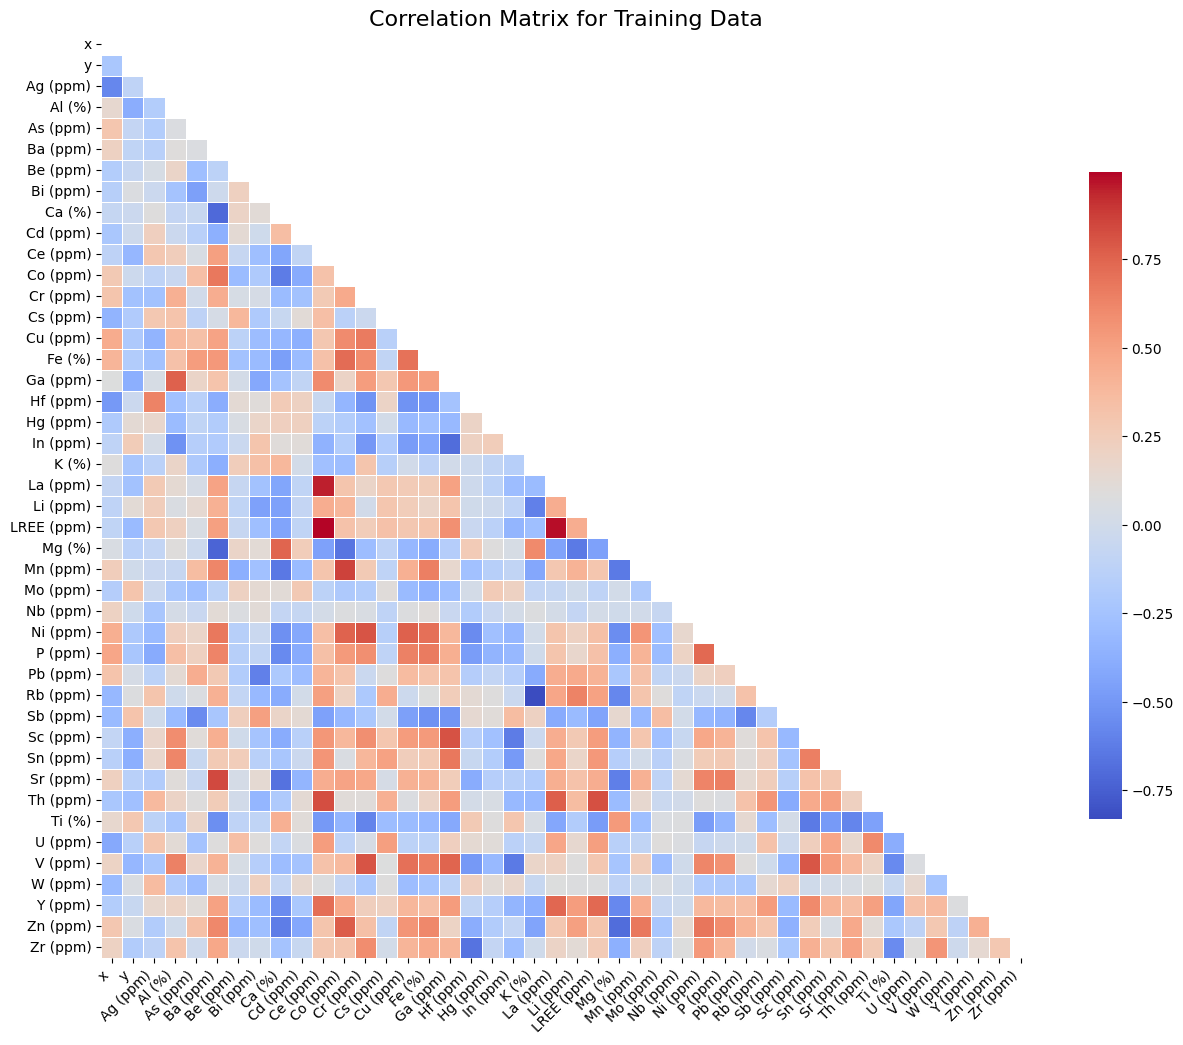

In [34]:
plot_correlation_heatmap(training, name = 'Training')

**Interpretation**

This figure is extremely essential for understanding the relationship between all the variables. Mostly, it is assumed that all the variables, especially the explanantory variables preferably be independent to help train the model to perform well against an unseen data. Although there are some red patches in between, the data looks really good to explain the target variable `Zn`. In our used case, some of the stronger correlations are inevitable given the chemical associations of a few elements in their respective outcrops and their respective arrangement in the chemical periodic table. 

High correlation among features may indicate multicollinearity, which can affect the stability and interpretability of the model. According to Sunil Kumar and Ilyoung Chong (2018), in the context of machine learning, it's often desirable to have features that are moderately correlated with the target but not highly correlated with each other. 

From a different perspective, this might be an indication of the spatial autocorrelation. Given the lithological distribution of the area, the concentration of many elements can correspond to that effect. Further explanation will be provided in the Feedback section of Milestone 2.
_____


### 3.2 - Spatial Explortion

The map below has the information of how our dataset was splited. 

It is fundamental to stress that this dataset is the pre-normalized one, since we need the original coordinates to identify the real location. That's the reason we are takin these dataframes `train` and `test`.


In [35]:
#transforming dataframes to geodataframes
gdf_training = gpd.GeoDataFrame(train,
                                geometry = gpd.points_from_xy(train.x,
                                                              train.y),
                                crs = 'EPSG:31983'
                                )

gdf_testing = gpd.GeoDataFrame(test, 
                               geometry = gpd.points_from_xy(test.x,
                                                             test.y),
                                crs = 'EPSG:31983'
                                )

#configuring the crs
gdf_testing = gdf_testing.to_crs('epsg:4326')
gdf_training = gdf_training.to_crs('epsg:4326')


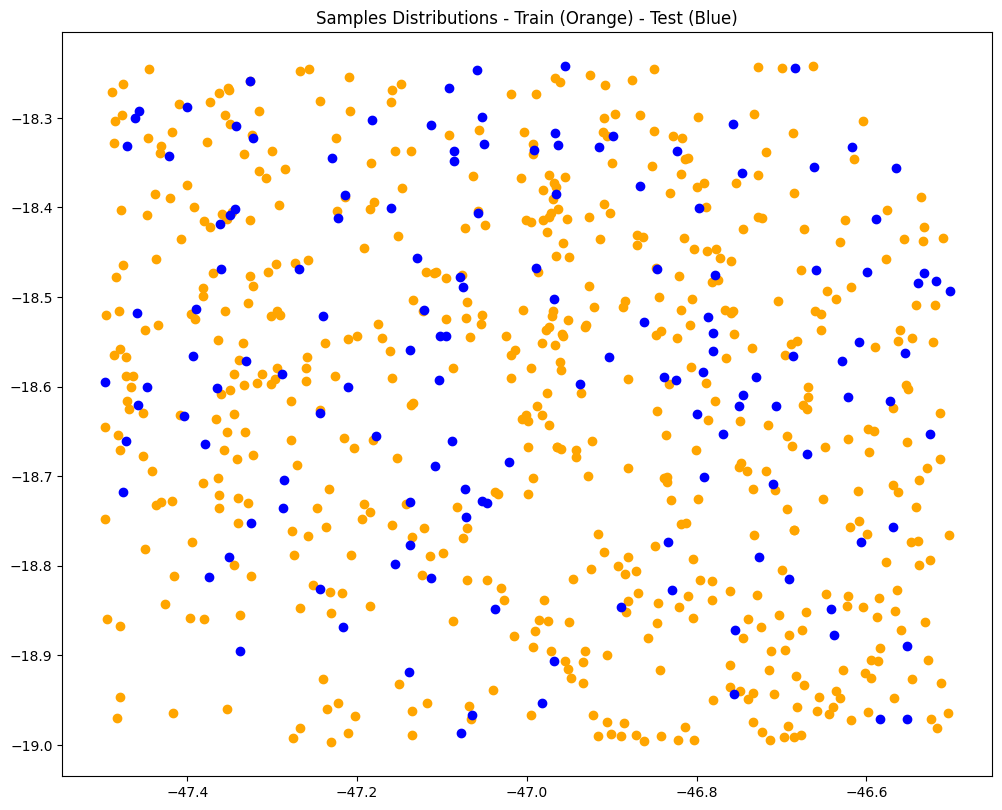

In [36]:
ax = gdf_training.plot(color = 'orange',legend = True, figsize=(12,10))
gdf_testing.plot(color = 'blue', legend = True, ax=ax)
ax.set_title('Samples Distributions - Train (Orange) - Test (Blue)');

In [37]:
m = gdf_training.explore(color ='orange', name="Train Samples")

m = gdf_testing.explore(m=m, color="blue", name="Test Samples")

folium.LayerControl().add_to(m)

m

**Interpretation**

The samples for training and testing present good random distribution. However, one thing that must be taken into consideration, and will be fixed for the next Milestone is: closer samples probably show high correlation due to the fact that they were collected within the same basin or same lithology. This spatial proximity might make our model biased. 

Having that in mind, the variable location do are important, and will be taken into consideration when creating the model. The same way will be taken into consideration their spatial autocorrelation. 

Depending on the results, will be necessary to perform another split based on this spatial proximity and autocorrelation.

____

## 4. Statistical Exploration <a name="4"></a>

[Table of Contents](#home)

**Description**

This section is basically a more descriptive section to explain what has been observed in the visualization section. In addition, we will use the `.describe()` function on our dataset to get the summary statistics and we will discuss the output of that function as well. 

Since, this is a case study from a geospatial domain, the impact of spatial autocorrelation and spatial bias in the preprocessing steps cannot be ignored. At the end, it will impact the training process of the model and consequently the performance of the model. 

We will try to address the challenge of sample's spatial autocorrelation for `Milestone 2`. As an update to the feedbacks.

### 4.1 Descriptive Statistical Analysis <a name="4.1"></a>
Conduct a descriptive statistical analysis of the dataset.

In [38]:
# using describe function

df_train = pd.read_csv('../dataset/train_test/training.csv')
df_test = pd.read_csv('../dataset/train_test/testing.csv')

summary_train= df_train.describe()
summary_test= df_test.describe()

print(tabulate(summary_train, headers='keys', tablefmt='pretty'))
print(tabulate(summary_test, headers='keys', tablefmt='pretty'))


+-------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+--------------------+--------------------+---------------------+---------------------+--------------------+---------------------+--------------------+---------------------+---------------------+--------------------+--------------------+--------------------+---------------------+---------------------+--------------------+---------------------+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+---------------------+---------------------+--------------------+---------------------+---------------------+---------------------+---------------------+--------------------+--------------------+---------------------+--------------------+--------------------+--------------------+---------------------+---------------------+
|       |         x          |         y  

**Interpretation**

In the tables above,  we can see that the values have been normalized that will help the training of the model. 

___

In the cell below, we are arbitrarily changing the order of the columns. In this case, only the last two columns were reordered. This meas that we are changing Zn (ppm) position index from -2 to -1. This will make things easier to filter the dataframe in the following plots. 

In [39]:
cols = ['x', 'y', 'Ag (ppm)', 'Al (%)', 'As (ppm)', 'Ba (ppm)', 'Be (ppm)',
       'Bi (ppm)', 'Ca (%)', 'Cd (ppm)', 'Ce (ppm)', 'Co (ppm)', 'Cr (ppm)',
       'Cs (ppm)', 'Cu (ppm)', 'Fe (%)', 'Ga (ppm)', 'Hf (ppm)', 'Hg (ppm)',
       'In (ppm)', 'K (%)', 'La (ppm)', 'Li (ppm)', 'LREE (ppm)', 'Mg (%)',
       'Mn (ppm)', 'Mo (ppm)', 'Nb (ppm)', 'Ni (ppm)', 'P (ppm)', 'Pb (ppm)',
       'Rb (ppm)', 'Sb (ppm)', 'Sc (ppm)', 'Sn (ppm)', 'Sr (ppm)', 'Th (ppm)',
       'Ti (%)', 'U (ppm)', 'V (ppm)', 'W (ppm)', 'Y (ppm)','Zr (ppm)', 'Zn (ppm)']

df_train.columns = cols
df_test.columns = cols

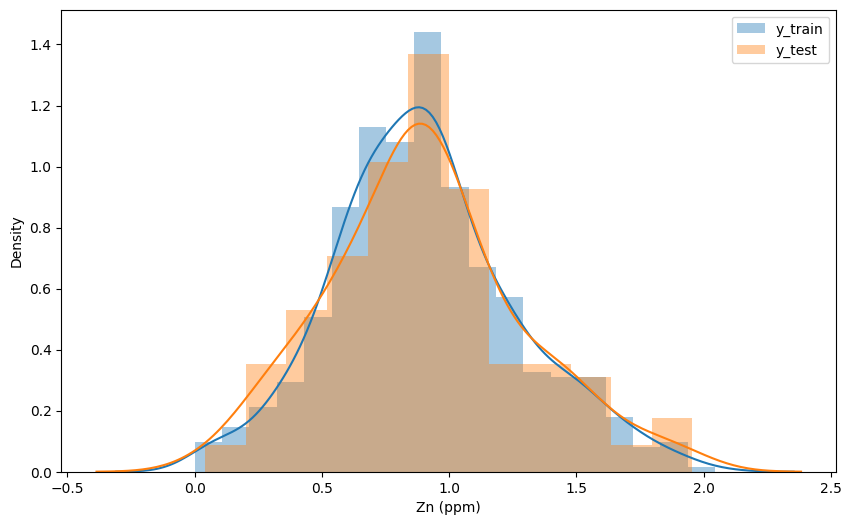

In [40]:
# x and y from training set
# all the variables except zn(ppm)
x_train = df_train.iloc[:, :-1]
x_test = df_test.iloc[:, :-1]
y_train = df_train.iloc[:, -1]
y_test = df_test.iloc[:, -1]

# plot the distribution of y_train and y_test to check there distribution

plt.figure(figsize=(10,6))
sns.distplot(y_train, label='y_train')
sns.distplot(y_test, label='y_test')
plt.legend()
plt.show()

### Distribution of train target and test target:

The distribution of test data is equally crucial to a machine learning model's effectiveness. The test data assess the model's performance on new, untested data. The model's performance on the test data will be a good indicator of its performance on new data if the test data is taken from the same distribution as the training data. A mismatch in distributions could lead to misleading performance estimates.

The model's performance on the test data may be a poor signal of its performance on new data if the test data are taken from a different distribution than the training data. This is because the model may have trained to base its predictions on traits exclusive to the training data and may not be present in the test data. ([tutorialspoint](https://www.tutorialspoint.com/distribution-of-test-data-vs-distribution-of-training-data#:~:text=The%20Importance%20of%20the%20Distribution%20of%20Test%20Data&text=The%20test%20data%20assess%20the,distribution%20as%20the%20training%20data. "Distribution of Test Data vs. Distribution of Training Data"))

In this case, the distribution is consistent, which is a good sign. In addition, it is evenly distributed around the mean as well. 

### 4.2 Correlation Analysis <a name="4.2"></a>

Determine the potential correlation between variables and comment on its implications for machine learning.


In [41]:
target_variable = df_train.columns[-1]

# Calculate correlation matrix
correlation_matrix = df_train.corr()

# Extract correlations with the target variable
target_correlations = correlation_matrix[target_variable].sort_values(ascending=False)

# Display top correlated features with the target variable
print("Top correlated features with the target variable:")
print(target_correlations)


Top correlated features with the target variable:
Zn (ppm)      1.000000
Cr (ppm)      0.591650
V (ppm)       0.557174
Ni (ppm)      0.539972
Sr (ppm)      0.493289
Ba (ppm)      0.469981
Fe (%)        0.454706
Sc (ppm)      0.426862
Cu (ppm)      0.401387
Ga (ppm)      0.396142
P (ppm)       0.390141
Al (%)        0.313379
Sn (ppm)      0.308907
Co (ppm)      0.296546
Ce (ppm)      0.290049
Zr (ppm)      0.281305
Th (ppm)      0.267842
LREE (ppm)    0.263654
Mn (ppm)      0.230624
x             0.206548
La (ppm)      0.192000
Y (ppm)       0.140269
Li (ppm)      0.118668
U (ppm)       0.082173
Nb (ppm)      0.078735
Rb (ppm)      0.054974
Cs (ppm)      0.008539
Pb (ppm)     -0.000933
Bi (ppm)     -0.008858
K (%)        -0.011377
W (ppm)      -0.023428
As (ppm)     -0.024062
Be (ppm)     -0.035389
Cd (ppm)     -0.061131
Hg (ppm)     -0.079039
Mo (ppm)     -0.114671
Ag (ppm)     -0.117693
y            -0.177218
Sb (ppm)     -0.216362
Ca (%)       -0.251614
In (ppm)     -0.288233
Mg (%) 

### Comment on correlation

In the exploratory phase of our project, we acknowledge the intuitive assumption that many variables are expected to be independent, lacking strong correlations to enhance their influence on the model. However, to validate these assumptions rigorously, statistical significance tests are crucial. At this point, the dataset doesn't exhibit a normal distribution, hindering the application of certain tests. Therefore, our preprocessing strategy involves normalizing and standardizing the data to meet the assumptions of these tests. Once the data is transformed, we plan to employ statistical tests such as the chi-square test, p-test, and t-test to uncover stronger correlations among the explanatory variables. These tests will provide a more robust understanding of the relationships within the dataset, aiding us in selecting relevant features for our predictive model.

#### Correlation Summary for this dataset

There is only a few high positive correlations from the explanatory variables against the targer variable. While, there are some negative corraltions as well. This has been observed as a good omen for regeression analysis. As there are no high correlations, the regression of the target variable will not have strong influence of a particulary highly correlated variable. Instead it will train well to perform better even in the absence or changes in that particular target variable.

- Specific details:

Co has a strong positive correlation of 0.71 with the target; Mg , Ni, and Fe also show strong positive correlations (around 0.63 to 0.58). While Several other features, such as Mn, Cr, Cu, Ba, Ti, Cd, P, and Hf, exhibit moderate positive correlations (ranging from 0.53 to 0.41). Some features like Al, U, and target variable have weak positive correlations (around 0.04). Features like W, Mo, Ag, Cs, and Th show weak negative correlations.


#### Note 

It's fundamental to stress out that correlation does not imply causation. These relationships are based on linear correlations and may not capture complex, non-linear dependencies. It might be beneficial to visualize some of the highly correlated features using scatterplots or conduct more advanced analysis to understand the nature of these relationships.
Remember, correlation is just one aspect of understanding relationships between variables, and the context of your specific analysis should guide the interpretation of these correlations [Saif,2023](https://medium.com/@JaveriaSaif/correlation-in-data-analytics-75fec1f2147d).


## 5. Evaluation Protocol <a name="5"></a>

[Table of Contents](#home)

### 5.1 Evaluation Metrics <a name="5.1"></a>

In order to carry out an evaluation of the model prediction, the following metrics will be used:

- `Mean Squared Error (MSE)`: such metric has an effect of inflating or magnifying large errors due to the squared operation on its formula. This is a way of penalizing models with large errors, what is interesting for this kind of study, due to the sensibility of data, and costs related to the whole prospection process in the mineral exploration industry.

- `Root Mean Squared Error (RMSE)`: has the same unit as the target value. Meanwhile MSE is used to train a regression prediction model, RMSE is used to indicate the model's performance.

- `R²`: this metric determines the proportion of the variance in the dependent variable that is predictable from the independent varible, indicating how well the model fits the data.


## 6. References <a name="6"></a>

Boggs, Sam Jr. 1987. Principles of Sedimentology and Stratigraphy. 1st ed. Merrill Pub. Co. ISBN 0675204879.

Carranza, E. J. M. 2009. “Chapter 5: Catchment Basin Analysis of Stream Sediment Anomalies.” Pp. 115–44 in Handbook of Exploration and Environmental Geochemistry. Vol. 11. Elsevier.

Doherty, Mary E., Kiel Arndt, Zhaoshan Chang, Karen Kelley, and Owen Lavin. 2023. “Stream Sediment Geochemistry in Mineral Exploration: A Review of Fine-Fraction, Clay-Fraction, Bulk Leach Gold, Heavy Mineral Concentrate and Indicator Mineral Chemistry.” Geochemistry: Exploration, Environment, Analysis geochem2022-039. doi: 10.1144/geochem2022-039.

Kulcsar, Levi. n.d. “Correlation: What Is It? How to Calculate It? .Corr() in Pandas.” Retrieved October 22, 2023 (https://data36.com/correlation-definition-calculation-corr-pandas/).

Marques, Eduardo Duarte, Cassiano Costa Castro, Renato De Assis Barros, Júlio César Lombello, Marcelo De Souza Marinho, Joanna Chaves S. Araújo, and Everton A. M. Santos. 2023. “Geochemical Mapping by Stream Sediments of the NW Portion of Quadrilátero Ferrífero, Brazil: Application of the Exploratory Data Analysis (EDA) and a Proposal for Generation of New Gold Targets in Pitangui Gold District.” Journal of Geochemical Exploration 250:107232. doi: 10.1016/j.gexplo.2023.107232.
Ottesen, R. T., and P. K. Theobald. 1994. “Stream Sediments in Mineral Exploration.” Pp. 147–84 in Handbook of Exploration Geochemistry. Vol. 6. Elsevier.

Palkovic, Martin. 2021. “Exploring Use Cases of Machine Learning in the Geosciences.” Medium. Retrieved October 21, 2023 (https://towardsdatascience.com/exploring-use-cases-of-machine-learning-in-the-geosciences-b72ea7aafe2).

Pawlowsky-Glahn, V., Olea, R.A., 2004. Geostatistical Analysis of Compositional Data. Studies in Mathematical Geology. Oxford University Press, New York, 304 p.

Pawlowsky-Glahn, V., Egozcue, J.J., 2016. Spatial analysis of compositional data: a historical review. J. Geochem. Explor. 164, 28–32. https://doi.org/10.1016/j. gexplo.2015.12.010.

REIMANN, C.; FILZMOSER, P. e GARRETT, R.G. (2008) - Statistical Data Analysis Explained: Applied Environmental Statistics with R. Chichester: John Wiley & Sons, 2008. 343 p.

ROSE, A. W.; HAWKES, H. E. e WEBB, J. S. (1979) - Geochemistry in mineral exploration. 2ed. New York: Academic Press.

Saif, Javeria. 2023. “Correlation in Data Analytics:” Medium. Retrieved October 21, 2023 (https://medium.com/@JaveriaSaif/correlation-in-data-analytics-75fec1f2147d).

Salomão, G. (2020). “MAPEAMENTO GEOQUÍMICO DA BACIA DO RIO ITACAIÚNAS, PROVÍNCIA MINERAL DE CARAJÁS: ASSINATURA GEOQUÍMICA DOS BLOCOS CRUSTAIS E IMPLICAÇÕES PARA RECURSOS MINERAIS E MEIO AMBIENTE.Pdf.” Mestrado, UNIVERSIDADE FEDERAL DO PARÁ, Belém.
Tabrez, Soheil. n.d. “Distribution of Test Data vs. Distribution of Training Data.” Retrieved October 22, 2023 (https://www.tutorialspoint.com/distribution-of-test-data-vs-distribution-of-training-data).

Xavier, V. (2023). “MAPEAMENTO GEOQUÍMICO POR SEDIMENTOS DE CORRENTE A  SUL DA FAIXA VAZANTE, MINAS GERAIS: ANÁLISE ESTATÍSTICA UNI,  BI E MULTIVARIADA E DEFINIÇÃO DE BACKGROUND GEOQUÍMICO.” Trabalho de Conclusão de Curso, Universidade Federal Rural do Rio de Janeiro, Seropédica.
